<a href="https://colab.research.google.com/github/Labonna929812/Basic-python/blob/main/Project_Predicting_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/GUB Doc/diabetes_project.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
import seaborn as sns

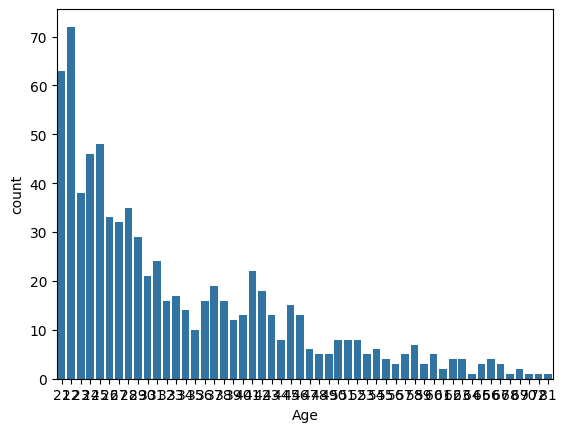

In [ ]:
sns.countplot(x='Age',data=dataset)
plt.show()

In [ ]:
dataset['Pregnancies'].value_counts()

,count
Pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


In [ ]:
dataset['BMI'].head()

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1


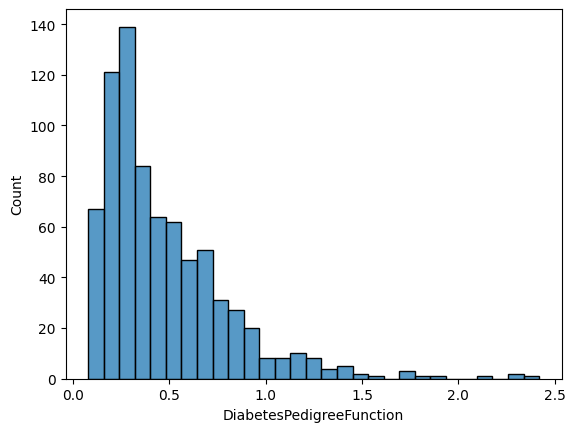

In [ ]:
sns.histplot(dataset['DiabetesPedigreeFunction'])
plt.show()

In [ ]:
X=dataset.drop('Outcome',axis=1)
y=dataset['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify = y)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model=XGBClassifier(
    max_depth=4,
    learning_rate=0.1,
    n_estimators=150,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric='logloss'
)

model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7467532467532467

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154


Confusion Matrix:
 [[82 18]
 [21 33]]


In [ ]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
dataset[cols_with_zeros] = dataset[cols_with_zeros].replace(0, np.nan)

imputer = SimpleImputer(strategy='mean')
dataset[cols_with_zeros] = imputer.fit_transform(dataset[cols_with_zeros])

X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing complete.")

Data preprocessing complete.


In [ ]:

log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)
y_pred_baseline = log_reg.predict(X_test_scaled)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print(f"Baseline Logistic Regression Accuracy: {accuracy_baseline:.4f}")

Baseline Logistic Regression Accuracy: 0.6948


In [ ]:

base_lr = LogisticRegression(random_state=42, solver='liblinear')

bagging_lr = BaggingClassifier(
    estimator=base_lr,
    n_estimators=50,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

bagging_lr.fit(X_train_scaled, y_train)

y_pred_bagging = bagging_lr.predict(X_test_scaled)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

print(f"Bagging (Ensemble) Logistic Regression Accuracy: {accuracy_bagging:.4f}")
print("-" * 30)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_bagging))

Bagging (Ensemble) Logistic Regression Accuracy: 0.6883
------------------------------

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       100
           1       0.57      0.48      0.52        54

    accuracy                           0.69       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.68      0.69      0.68       154



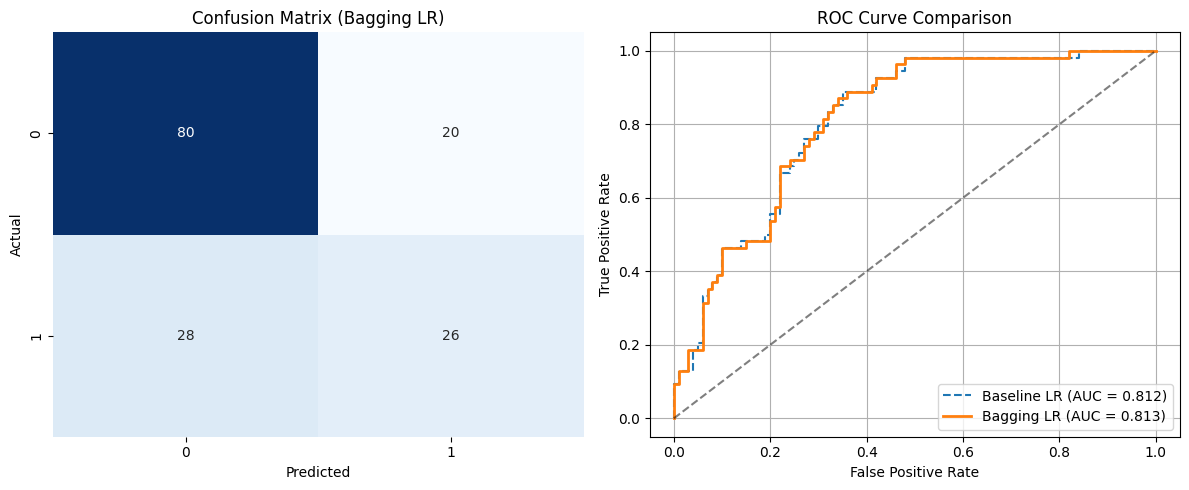

In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_bagging)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Bagging LR)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)

y_prob_base = log_reg.predict_proba(X_test_scaled)[:, 1]
y_prob_bag = bagging_lr.predict_proba(X_test_scaled)[:, 1]

fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_base)
fpr_bag, tpr_bag, _ = roc_curve(y_test, y_prob_bag)
auc_base = roc_auc_score(y_test, y_prob_base)
auc_bag = roc_auc_score(y_test, y_prob_bag)

plt.plot(fpr_base, tpr_base, linestyle='--', label=f'Baseline LR (AUC = {auc_base:.3f})')
plt.plot(fpr_bag, tpr_bag,  linewidth=2, label=f'Bagging LR (AUC = {auc_bag:.3f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()